In [1]:
import os
import cv2
import numpy as np
from keras.utils import np_utils
from sklearn.utils import shuffle
from matplotlib import pyplot as plt

In [3]:
ds_path = r'F:\Artificial Intelligence\Datasets\Garbage Seg V10\Dataset\test'
classes = os.listdir(ds_path)
label_map = {k: i for i, k in enumerate(classes)}
label_map

{'battery': 0,
 'cardboard': 1,
 'clothes': 2,
 'food': 3,
 'glass': 4,
 'medical': 5,
 'metal': 6,
 'paper': 7,
 'plastic': 8,
 'shoes': 9}

In [4]:
X = []
y = []

for label in label_map:
    label_dir_path = os.path.join(ds_path, label)
    label_img_names = os.listdir(label_dir_path)

    for name in label_img_names:
        label_img = cv2.imread(os.path.join(label_dir_path, name))
        label_img = cv2.cvtColor(label_img, cv2.COLOR_BGR2RGB)
        label_img = cv2.resize(label_img, (100, 100))

        X.append(label_img)
        y.append(label_map[label])

X = np.array(X)
y = np.array(y)

print(X.shape, y.shape)

(1536, 100, 100, 3) (1536,)


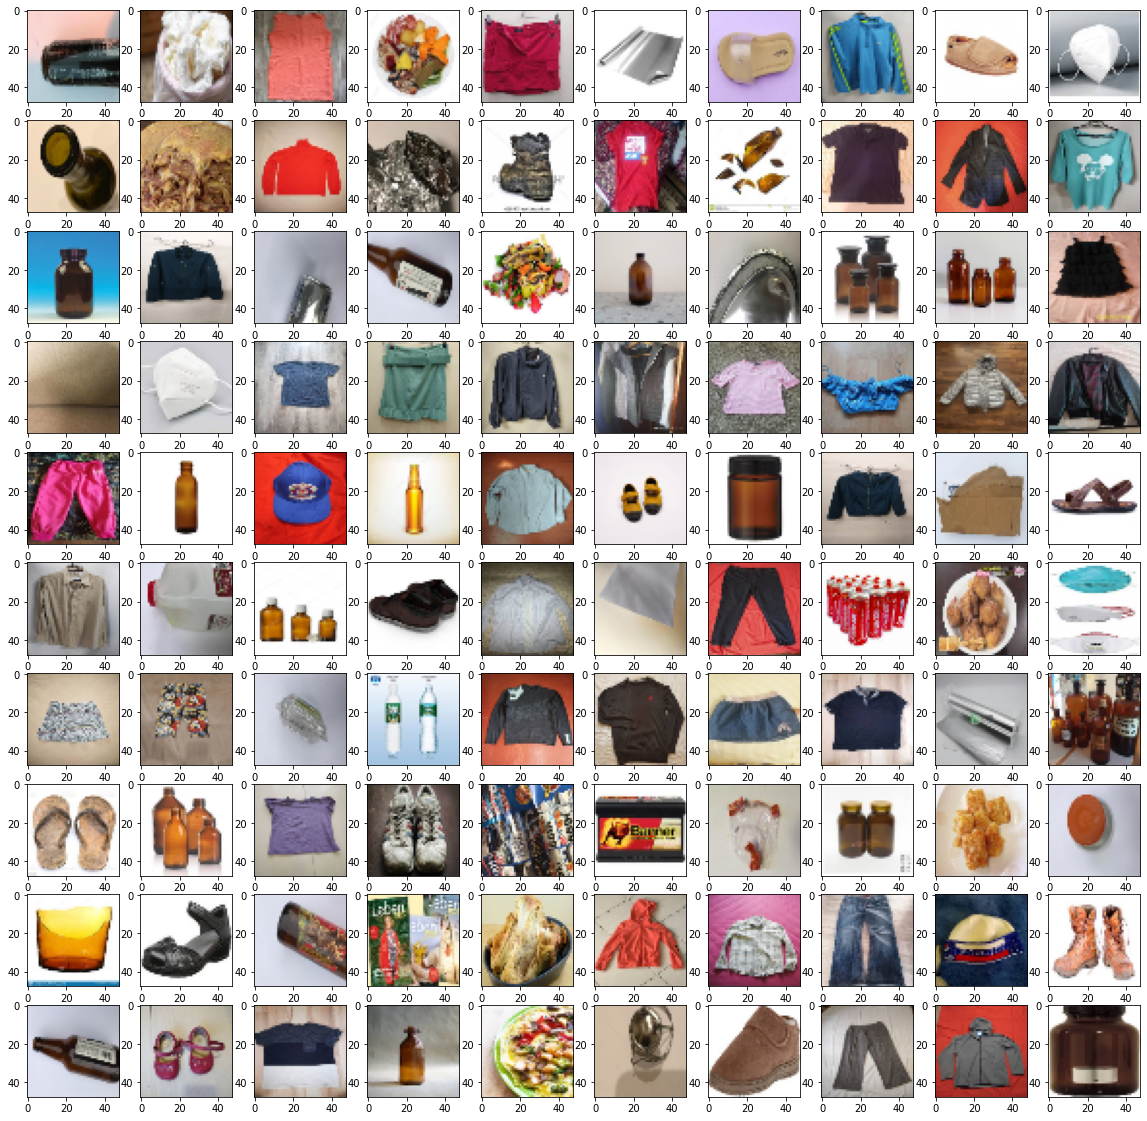

In [5]:
shuffled_data = shuffle(X[:])
rows, cols = 10, 10

plt.figure(figsize=(20, 20))

for i in range(rows * cols):
  plt.subplot(cols, rows, i+1)
  plt.imshow(cv2.resize(shuffled_data[i], (48, 48)).reshape(48, 48, 3))

plt.show()

In [6]:
label_count = []

for i in range(len(label_map)):
    label_count.append(np.sum(y == i))

label_count_dict = {list(label_map.keys())[i]: label_count[i] for i in range(len(label_map))}
label_count_dict

{'battery': 25,
 'cardboard': 89,
 'clothes': 532,
 'food': 98,
 'glass': 251,
 'medical': 70,
 'metal': 77,
 'paper': 105,
 'plastic': 91,
 'shoes': 198}

In [7]:
for k, v in label_count_dict.items():
    print(k, ' - ', int(round(v * 0.1, 0)))

battery  -  2
cardboard  -  9
clothes  -  53
food  -  10
glass  -  25
medical  -  7
metal  -  8
paper  -  10
plastic  -  9
shoes  -  20


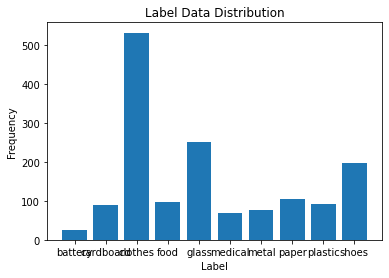

In [8]:
pos = range(len(label_count))
plt.bar(pos, label_count)
plt.xticks(pos, list(label_map.keys()))
plt.title('Label Data Distribution')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()

In [9]:
# X = X / 255.0
y = np_utils.to_categorical(y)

In [10]:
print(X.shape, y.shape)

(1536, 100, 100, 3) (1536, 10)


In [10]:
np.save("../numpy/testX.npy", X)
np.save("../numpy/testY.npy", y)